In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils as kutils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/crop_recommendation.csv')


In [3]:
df=df.drop('P',axis=1)
df=df.drop('K',axis=1)
df=df.drop('ph',axis=1)
df=df.drop('N',axis=1)
df['rainfall'] = (df['rainfall'] - df['rainfall'].min()) / (df['rainfall'].max() - df['rainfall'].min())*100
df.rename(columns={'rainfall': 'moisture'}, inplace=True)
df




,temperature,humidity,moisture,label
0,20.879744,82.002744,65.645778,rice
1,21.770462,80.319644,74.167459,rice
2,23.004459,82.320763,87.571039,rice
3,26.491096,80.158363,79.990547,rice
4,20.130175,81.604873,87.123073,rice
...,...,...,...,...
2195,26.774637,66.413269,56.606392,coffee
2196,27.417112,56.636362,38.697247,coffee
2197,24.131797,67.225123,55.007079,coffee
2198,26.272418,52.127394,38.428046,coffee


import numpy as np
from google.colab import autoviz
df_7315037391139471728 = autoviz.get_registered_df('df_7315037391139471728')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7315037391139471728, *['temperature'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1666822340132198589 = autoviz.get_registered_df('df_1666822340132198589')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1666822340132198589, *['humidity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7153561569639604480 = autoviz.get_registered_df('df_7153561569639604480')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7153561569639604480, *['moisture'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1476810890380474525 = autoviz.get_registered_df('df_1476810890380474525')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1476810890380474525, *['temperature'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4056227626496298320 = autoviz.get_registered_df('df_4056227626496298320')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4056227626496298320, *['humidity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5905595963720420833 = autoviz.get_registered_df('df_5905595963720420833')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5905595963720420833, *['moisture'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1135403805268010525 = autoviz.get_registered_df('df_1135403805268010525')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1135403805268010525, *[[['temperature', 'humidity'], ['humidity', 'moisture']]], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   moisture     2200 non-null   float64
 3   label        2200 non-null   object 
dtypes: float64(3), object(1)
memory usage: 68.9+ KB


In [5]:
df.isnull().any()

temperature    False
humidity       False
moisture       False
label          False
dtype: bool

In [6]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
diag_gr = df.groupby('label', axis=0)
df_count=pd.DataFrame(diag_gr.size(), columns=['# of observations'])
print(df_count)

             # of observations
label                         
apple                      100
banana                     100
blackgram                  100
chickpea                   100
coconut                    100
coffee                     100
cotton                     100
grapes                     100
jute                       100
kidneybeans                100
lentil                     100
maize                      100
mango                      100
mothbeans                  100
mungbean                   100
muskmelon                  100
orange                     100
papaya                     100
pigeonpeas                 100
pomegranate                100
rice                       100
watermelon                 100


In [8]:
df = df.dropna()
# Encode the 'label' column
le = LabelEncoder()
mapping_df = df[['label']].copy()
mapping_df['label_encoded'] = le.fit_transform(df['label'].values)

In [9]:
mapping_df
d1 = mapping_df.drop_duplicates('label').set_index('label')
print(d1)


             label_encoded
label                     
rice                    20
maize                   11
chickpea                 3
kidneybeans              9
pigeonpeas              18
mothbeans               13
mungbean                14
blackgram                2
lentil                  10
pomegranate             19
banana                   1
mango                   12
grapes                   7
watermelon              21
muskmelon               15
apple                    0
orange                  16
papaya                  17
coconut                  4
cotton                   6
jute                     8
coffee                   5


In [10]:
df['label'] = le.fit_transform(df['label'])
X = df.drop('label', axis=1)
y = df['label']
X
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

<Axes: >

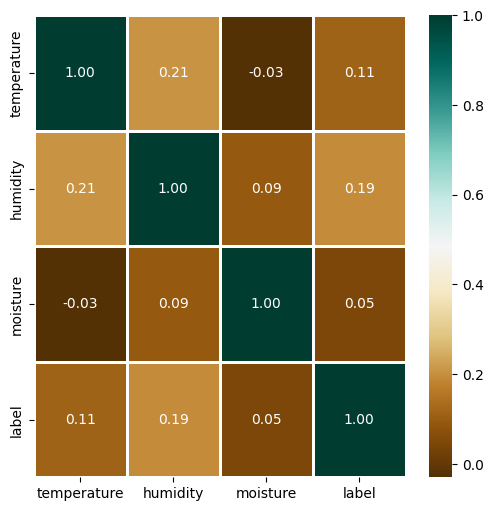

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [12]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,temperature,humidity,moisture
1102,27.003155,47.675254,27.174503
1159,28.347161,53.539031,25.217039
141,24.794708,70.045567,20.304497
1004,26.054330,79.396545,33.417947
2,23.004459,82.320763,87.571039
...,...,...,...
1638,21.213070,91.353492,33.329460
1095,27.359116,84.546250,25.364300
1130,27.920633,51.779659,28.757906
1294,13.429886,80.066340,18.390291


import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6907259656577073833, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6907259656577073833, *['temperature'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6907259656577073833, *['humidity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6907259656577073833, *['moisture'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6907259656577073833, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6907259656577073833, *['temperature'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6907259656577073833, *['humidity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6907259656577073833, *['moisture'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907259656577073833 = autoviz.get_registered_df('df_6907259656577073833')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_6907259656577073833, *[[['index', 'temperature'], ['temperature', 'humidity'], ['humidity', 'moisture']]], **{})
chart

In [16]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9212121212121213


In [19]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)



In [24]:
user_input = input("Enter your input (separate each feature by a space): ")
user_input = user_input.split()
user_input = np.array(user_input).reshape(1, 3)
prediction = model.predict(user_input)

# Print the predicted value
predicted = np.argmax(prediction)
print("Predicted value:", prediction)

label_mapping = {
    0:'apple',1: 'banana',2: 'blackgram',3: 'chickpea',4: 'coconut',5: 'coffee',6: 'cotton', 7: 'grapes',8: 'jute',9: 'kidneybeans',10:'lentil',11:'maize',
    12:'mango',13:'mothbeans',14:'mungbeans',15:'muskmelon',16:'orange',17:'papaya',18:'pigeonpeas',19:'pomegranate',20:'rice',21:'watermelon'
}

# Convert the predicted label to its original name using the mapping
predicted_class = label_mapping[prediction[0]]

# Print the predicted class
print("Predicted class:", predicted_class)

Enter your input (separate each feature by a space): 30 60 80
Predicted value: [18]
Predicted class: pigeonpeas


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
